In [1]:
from fastbook import *

In [2]:
urls = search_images_ddg('bird photos',max_images=1)
len(urls),urls[0]

(1, 'https://chilternchatter.com/wp-content/uploads/2018/01/RED-Bird.jpg')

In [3]:
dest = Path('bird.jps')
if not dest.exists(): download_url(urls[0],dest,show_progress=True)

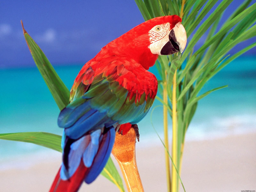

In [4]:
im = Image.open(dest)
im.to_thumb(256,256)

In [11]:
searches = 'forest', 'bird'
path = Path("bird_or_not")

if path.exists():
    for i in searches:
        dest = (path/i)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{i} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest,max_size=400, dest=dest)

In [15]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#6) [None,None,None,None,None,None]

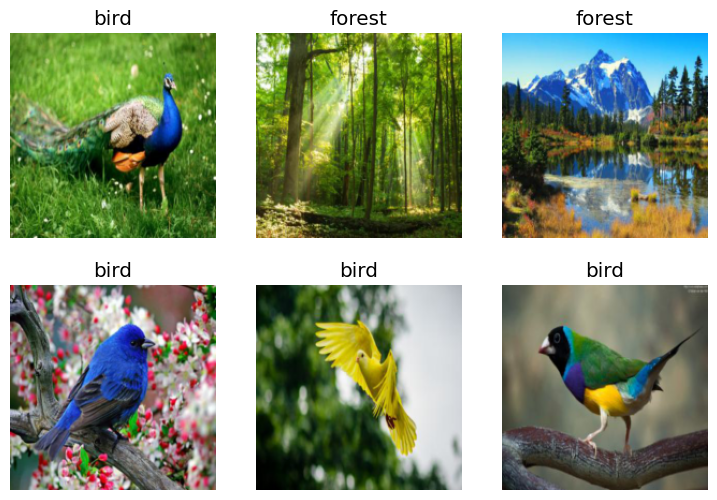

In [18]:
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)